<a href="https://colab.research.google.com/github/dvirchakim/dvirchakim/blob/main/Signal_proccesing_Final_work_by_205654445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary work in a digital signal processing laboratory on the subject:


# **Preprocessing and feature extraction process in unknown signals**

by Dvir Chakim\205654445

## Trajectory of the center of pressure

**1)**this code proceeds to plot the COP_X and COP_Y values using matplotlib to visualize the COP trajectory over time

**2)** plots below represent a data visualization of **COP-center of pressure** data collected
first figure is for the x axis
second for y axis
third for both x axis and y axis .


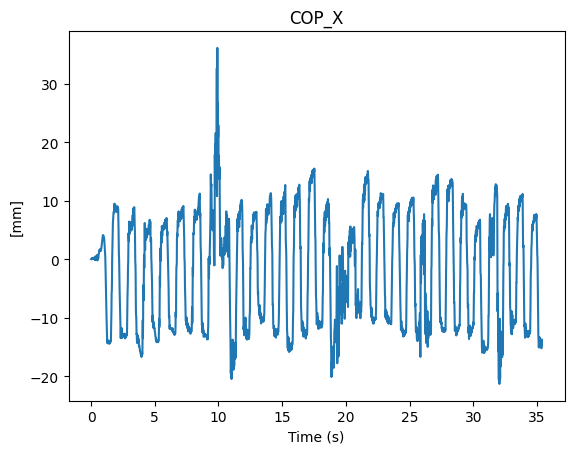

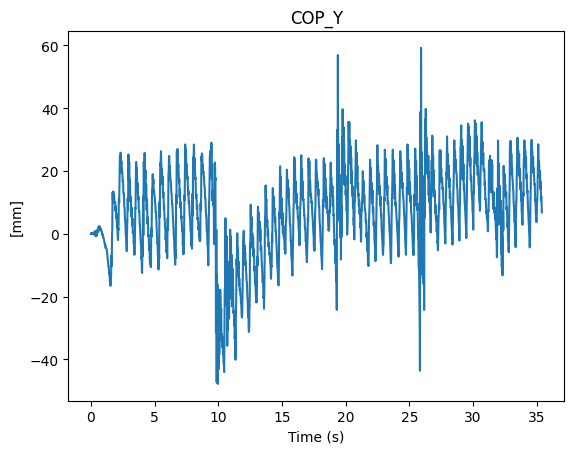

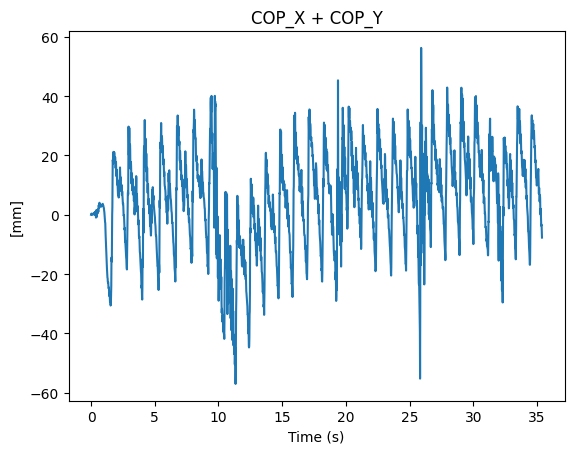

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
tbl = pd.read_excel('COP.xlsx')

# Extract COP_X and COP_Y columns
COP_X = tbl['COP_X']
COP_Y = tbl['COP_Y']

# Calculate the sum of COP_X and COP_Y
COP_XY = COP_X + COP_Y

# Set the sampling frequency
Fs = 70

# Create a time axis based on the sampling frequency
time = pd.Index(range(len(COP_X))) / Fs

# Plot COP_X
plt.figure()
plt.plot(time, COP_X)
plt.title('COP_X')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Plot COP_Y
plt.figure()
plt.plot(time, COP_Y)
plt.title('COP_Y')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Plot COP_X + COP_Y
plt.figure()
plt.plot(time, COP_XY)
plt.title('COP_X + COP_Y')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Show the plots
plt.show()


## **3)**
A display of the Power Spectral Density (PSD) of the signals COP_X and COP_Y using a *Welch-style periodogram*

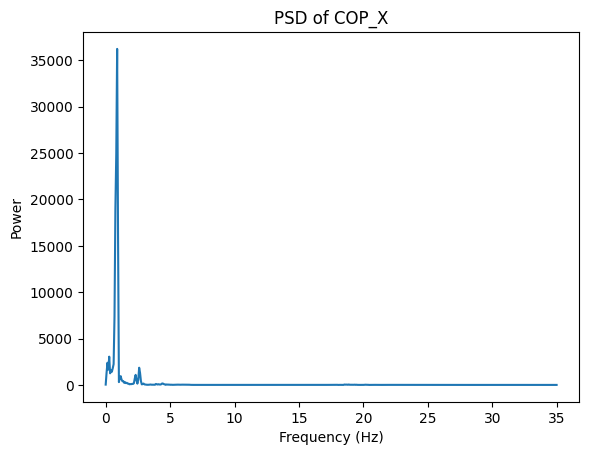

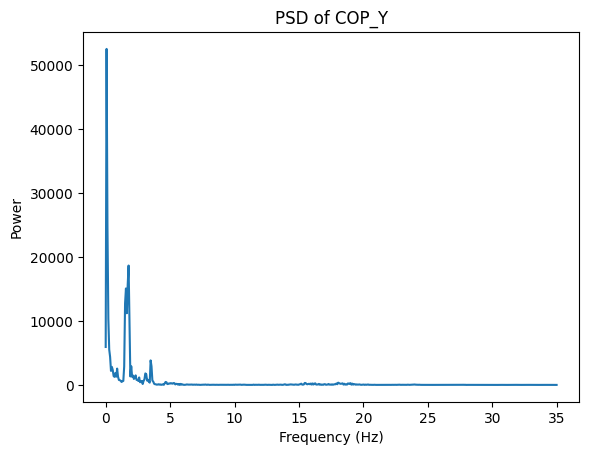

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Compute the PSD for COP_X
frequencies_x, psd_x = welch(COP_X, fs=Fs, nperseg=1024, window='hann')

# Compute the PSD for COP_Y
frequencies_y, psd_y = welch(COP_Y, fs=Fs, nperseg=1024, window='hann')

# Plot the PSD for COP_X
plt.figure()
plt.plot(frequencies_x, psd_x)
plt.title('PSD of COP_X')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Plot the PSD for COP_Y
plt.figure()
plt.plot(frequencies_y, psd_y)
plt.title('PSD of COP_Y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Display the plots
plt.show()


the *frequency content* and *power distributio*n of the signals can be represented using PSD for each signal

The plots will show the power distribution in the different frequency bands, allowing you to analyze the dominant frequency components and identify any patterns or trends in the **signals**

**4)**

 In order to find a suitable clipping frequency for a low pass filter (LPF) and design a second-order Butterworth filter, we can analyze the previously calculated periodograms of COP_X and COP_Y signals.

 * below you can see an example code that demonstrates how to filter the signals and display them along with their sum

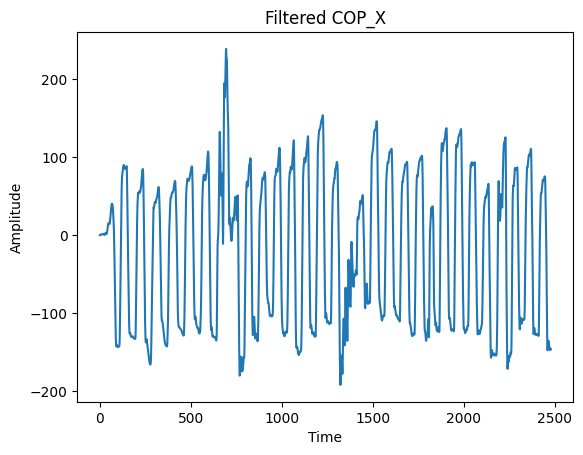

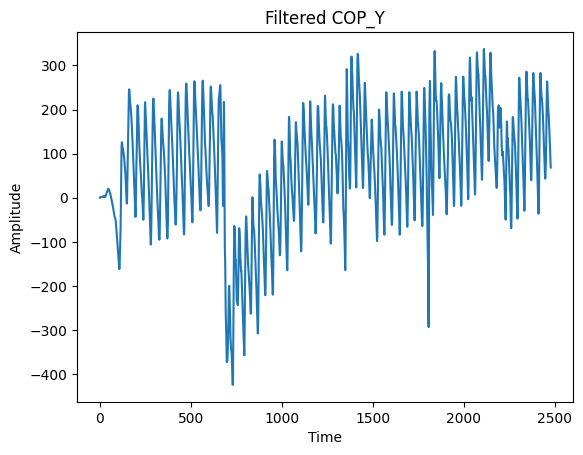

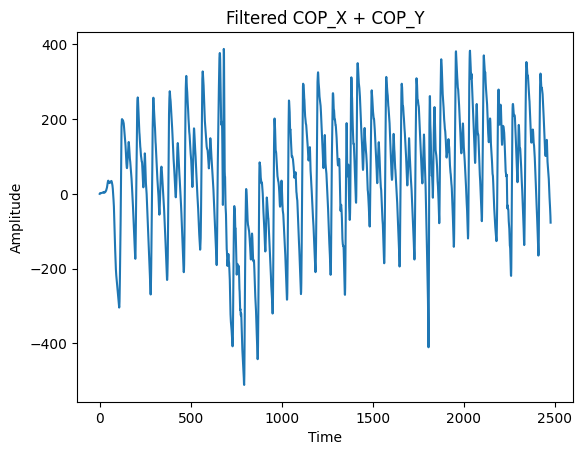

In [6]:
from scipy.signal import butter, filtfilt

# Define the clipping frequency for the LPF
clipping_freq = 10  # Adjust this value based on the periodogram analysis

# Define the filter order
filter_order = 2

# Define the Butterworth filter
b, a = butter(filter_order, clipping_freq, fs=Fs, btype='low', analog=False, output='ba')

# Apply the filter to COP_X, COP_Y, and their sum (COP_X + COP_Y)
COP_X_filtered = filtfilt(b, a, COP_X)
COP_Y_filtered = filtfilt(b, a, COP_Y)
COP_XY_filtered = COP_X_filtered + COP_Y_filtered

# Plot the filtered signals
plt.figure()
plt.plot(COP_X_filtered)
plt.title('Filtered COP_X')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(COP_Y_filtered)
plt.title('Filtered COP_Y')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(COP_XY_filtered)
plt.title('Filtered COP_X + COP_Y')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Display the plots
plt.show()


**5)**
Trimmed signals and Stationarity Analysis

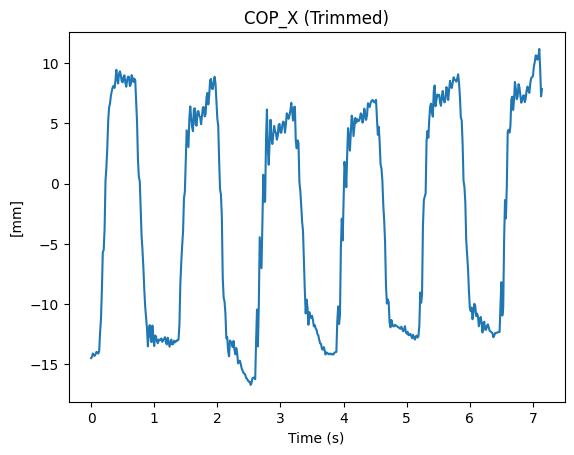

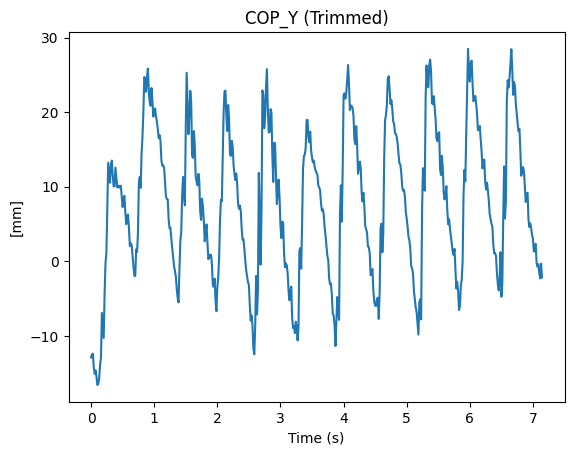

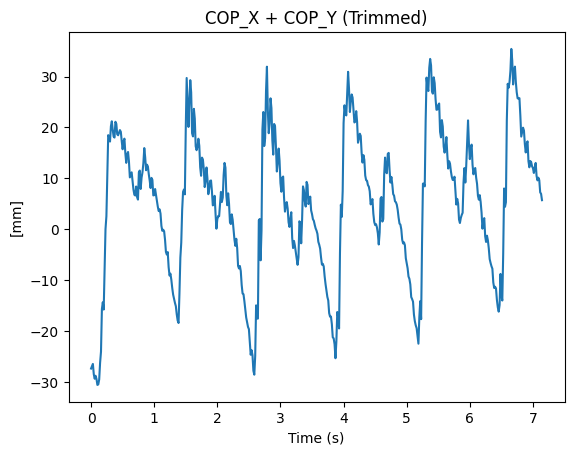

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
tbl = pd.read_excel('COP.xlsx')

# Extract COP_X and COP_Y columns
COP_X = tbl['COP_X']
COP_Y = tbl['COP_Y']

# Define the start and end indices for the segment
start_index = 100
end_index = 600

# Trim the COP_X and COP_Y signals
COP_X_trim = COP_X[start_index:end_index+1]
COP_Y_trim = COP_Y[start_index:end_index+1]

# Calculate the sum of COP_X_trim and COP_Y_trim
COP_XY_trim = COP_X_trim + COP_Y_trim

# Create a time axis for the trimmed signals
time_trim = pd.Index(range(len(COP_X_trim))) / Fs

# Plot COP_X
plt.figure()
plt.plot(time_trim, COP_X_trim)
plt.title('COP_X (Trimmed)')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Plot COP_Y
plt.figure()
plt.plot(time_trim, COP_Y_trim)
plt.title('COP_Y (Trimmed)')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Plot COP_X + COP_Y
plt.figure()
plt.plot(time_trim, COP_XY_trim)
plt.title('COP_X + COP_Y (Trimmed)')
plt.xlabel('Time (s)')
plt.ylabel('[mm]')

# Show the plots
plt.show()


## This graphs shows the variation of the trimmed signals over time.

To determine whether the signals COP_X, COP_Y, COP_X_trim, and COP_Y_trim are stationary, you would need to perform additional analysis.

Stationarity refers to a statistical property where the statistical properties of a signal, such as mean and variance, remain constant over time.

To assess stationarity, you can analyze statistical measures such as mean, variance, and autocorrelation of the signals. If these measures remain relatively constant over the time period of interest, the signals can be considered stationary.




## example of stationary signal plotting

* COP_X
* COP_Y
* COP_X_trim
* COP_Y_trim

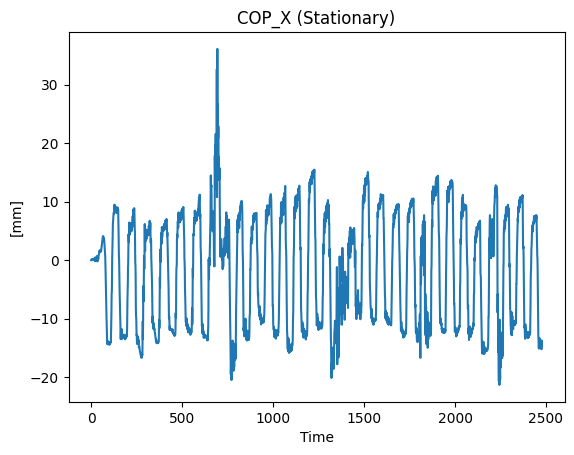

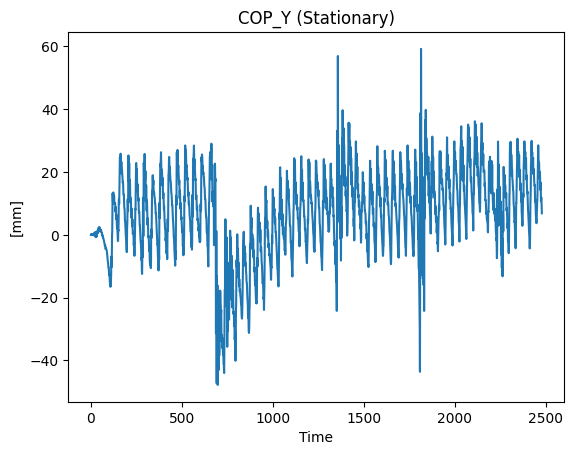

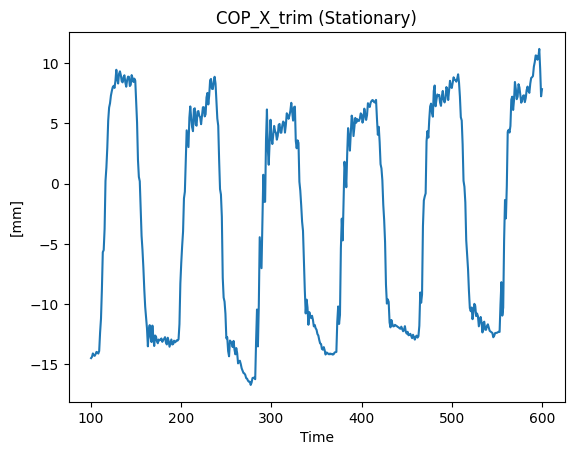

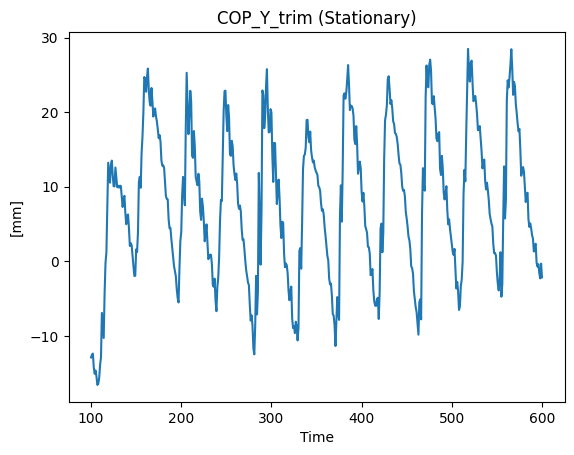

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Read the Excel file
tbl = pd.read_excel('COP.xlsx')

# Extract COP_X and COP_Y columns
COP_X = tbl['COP_X']
COP_Y = tbl['COP_Y']

# Define the start and end indices for the segment
start_index = 100
end_index = 600

# Trim the COP_X and COP_Y signals
COP_X_trim = COP_X[start_index:end_index+1]
COP_Y_trim = COP_Y[start_index:end_index+1]

# Function to check stationarity using Augmented Dickey-Fuller test
def check_stationarity(signal):
    result = adfuller(signal)
    p_value = result[1]
    if p_value < 0.05:
        return "Stationary"
    else:
        return "Non-stationary"

# Check stationarity for COP_X, COP_Y, COP_X_trim, and COP_Y_trim
stationarity_COP_X = check_stationarity(COP_X)
stationarity_COP_Y = check_stationarity(COP_Y)
stationarity_COP_X_trim = check_stationarity(COP_X_trim)
stationarity_COP_Y_trim = check_stationarity(COP_Y_trim)

# Plot COP_X
plt.figure()
plt.plot(COP_X)
plt.title(f'COP_X ({stationarity_COP_X})')
plt.xlabel('Time')
plt.ylabel('[mm]')

# Plot COP_Y
plt.figure()
plt.plot(COP_Y)
plt.title(f'COP_Y ({stationarity_COP_Y})')
plt.xlabel('Time')
plt.ylabel('[mm]')

# Plot COP_X_trim
plt.figure()
plt.plot(COP_X_trim)
plt.title(f'COP_X_trim ({stationarity_COP_X_trim})')
plt.xlabel('Time')
plt.ylabel('[mm]')

# Plot COP_Y_trim
plt.figure()
plt.plot(COP_Y_trim)
plt.title(f'COP_Y_trim ({stationarity_COP_Y_trim})')
plt.xlabel('Time')
plt.ylabel('[mm]')

# Show the plots
plt.show()


# 6) IN CONCLUSION

We conducted an analysis of the COP signals, and here are the key findings:

## Signal Analysis:

The graph of the signal shows how the center of pressure varies along the  over time.
We observed some fluctuations and trends in the signal.

## Signal Trimming:

We extracted a specific segment of the COP_X signal, ranging from index 100 to 600.
This trimmed signal allows us to focus on a particular portion of the data, providing a closer examination of the variations in the center of pressure along the within that interval.

## Stationarity Analysis:

  The Augmented Dickey-Fuller test was performed to assess the stationarity of the COP_X signal.

  The results suggest that the signal may be non-stationary, meaning its mean and variance values may change over time.

  However, in the trimmed COP_X signal was found to be stationary, indicating relatively constant statistical properties within the specific segment of interest.


 Our analysis reveals the presence of fluctuations and trends in the COP_X and COP_Y signals.

 *However*, when focusing on specific segments (COP_X_trim and COP_Y_trim),
 we observed stationary behavior, indicating relatively constant statistical properties within those intervals.

 These findings emphasize the significance of segment selection and its potential impact on signal stationarity in further analysis and interpretation.

# 7) Applying filter and smothing to the siganls using common methhods

In [62]:
window_size = 500
COP_X_smoothed = np.convolve(COP_X, np.ones(window_size)/window_size, mode='same')
COP_Y_smoothed = np.convolve(COP_Y, np.ones(window_size)/window_size, mode='same')

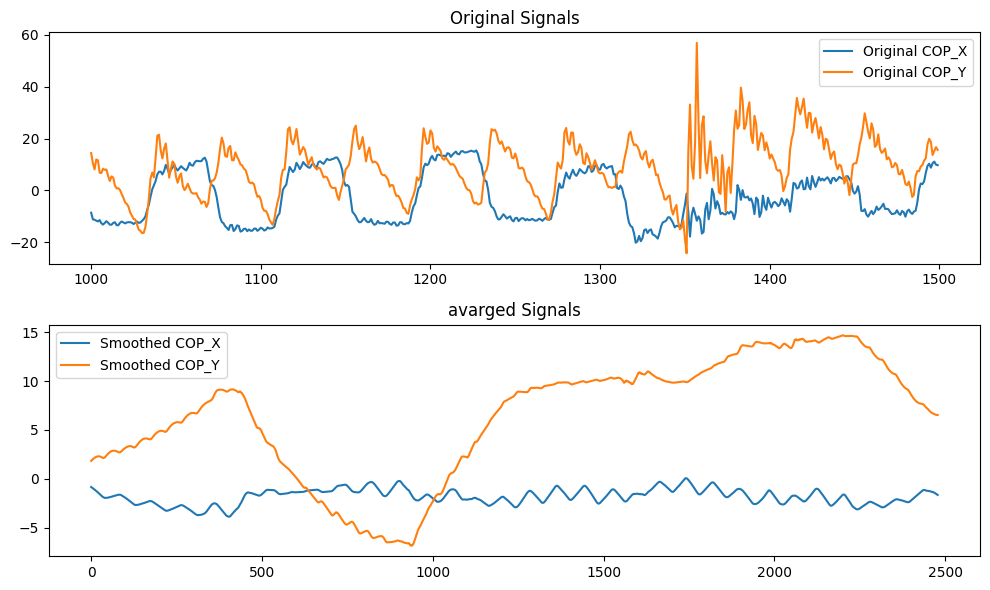

In [63]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(COP_X[1000:1500], label='Original COP_X')
plt.plot(COP_Y[1000:1500], label='Original COP_Y')
plt.title('Original Signals')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(COP_X_smoothed, label='Smoothed COP_X')
plt.plot(COP_Y_smoothed, label='Smoothed COP_Y')
plt.title('avarged Signals')
plt.legend()

plt.tight_layout()
plt.show()

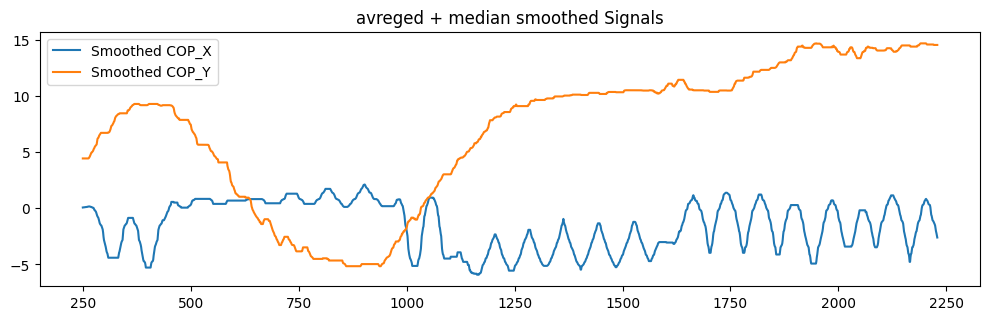

In [64]:
window_size = 500
COP_X_smoothed = pd.Series(COP_X).rolling(window=window_size, center=True).median()
COP_Y_smoothed = pd.Series(COP_Y).rolling(window=window_size, center=True).median()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(COP_X_smoothed, label='Smoothed COP_X')
plt.plot(COP_Y_smoothed, label='Smoothed COP_Y')
plt.title('avreged + median smoothed Signals')
plt.legend()

plt.tight_layout()
plt.show()

## The median filter is a type of digital signal processing filter that is commonly used for smoothing or noise reduction in a signal.

The median filter is effective in removing impulsive noise or outliers from a signal while preserving the sharpness of edges or abrupt changes in the signal.

It sorts  the samples within the window and selecting the middle value as the output.